In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
import datetime
import folium #Longitude and Lattitude mapping.


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns
from itertools import *
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster 
from IPython.display import HTML, display

In [2]:
calendar = pd.read_csv('2020_hongkong_calendar.csv')
detail_listing = pd.read_csv('2020_hongkong_listings.csv') #detailed listings
detail_reviews = pd.read_csv('2020_hongkong_reviews.csv') #detailed reviews


In [3]:
detail_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20201110180305,2020-11-10,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"In the upper part of trendy, hip Sheung Wan, w...",https://a0.muscache.com/pictures/84364564/1e0c...,160139,https://www.airbnb.com/users/show/160139,...,10.0,10.0,9.0,NaN,f,1,1,0,0,1.13
1,75083,https://www.airbnb.com/rooms/75083,20201110180305,2020-11-10,SoHo off Hollywood Road 3B,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2873745/90c15...,304876,https://www.airbnb.com/users/show/304876,...,9.0,10.0,9.0,NaN,f,14,10,4,0,1.94
2,103760,https://www.airbnb.com/rooms/103760,20201110180305,2020-11-10,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",NaN,https://a0.muscache.com/pictures/815221/056993...,304876,https://www.airbnb.com/users/show/304876,...,10.0,10.0,9.0,NaN,f,14,10,4,0,2.38
3,104626,https://www.airbnb.com/rooms/104626,20201110180305,2020-11-10,Entire Flat - Next to Man Mo Temple,<b>The space</b><br />Situated in one of Hong ...,NaN,https://a0.muscache.com/pictures/1947265/ef01a...,544166,https://www.airbnb.com/users/show/544166,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.12
4,132773,https://www.airbnb.com/rooms/132773,20201110180305,2020-11-10,Fabulous 2 Bdrm Aprt Open kitchen,"Nicely decorated, spacious 2 bedroom apartment...",The Sheung Wan neighbourhood is ever changing ...,https://a0.muscache.com/pictures/36936441/e4c1...,304876,https://www.airbnb.com/users/show/304876,...,10.0,10.0,10.0,NaN,f,14,10,4,0,3.12


In [4]:
detail_listing.shape

(7226, 74)

In [5]:
detail_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...


In [6]:
detail_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138963 entries, 0 to 138962
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     138963 non-null  int64 
 1   id             138963 non-null  int64 
 2   date           138963 non-null  object
 3   reviewer_id    138963 non-null  int64 
 4   reviewer_name  138960 non-null  object
 5   comments       138846 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.4+ MB


In [7]:
detail_reviews['reviewer_id'].value_counts()#.loc[lambda x : x>10]

24779930     20
8269040      20
215818538    18
215822237    18
5750451      18
             ..
19546893      1
150409010     1
27213620      1
15677237      1
192654145     1
Name: reviewer_id, Length: 128232, dtype: int64

In [8]:
detail_reviews.groupby('listing_id')['reviewer_id'].value_counts().loc[lambda x : x>5].sort_values(ascending=False)

listing_id  reviewer_id
8645263     24779930       20
21846948    5750451        14
22277128    12542251       13
14961766    1323897         7
12874832    132544023       7
7931794     14765464        7
5242151     23693530        7
19442489    80616690        6
2657448     51864112        6
714585      205189686       6
Name: reviewer_id, dtype: int64

In [9]:
detail_reviews.loc[detail_reviews['reviewer_id'] == 24779930].sort_values(by=['date'])

,listing_id,id,date,reviewer_id,reviewer_name,comments
44074,8645263,74798629,2016-05-16,24779930,Yujing,"非常感谢,我们聊天就像朋友一样｡哈哈"
44077,8645263,77305079,2016-05-31,24779930,Yujing,"真的非常好,我最爱的Sophie"
44078,8645263,77517018,2016-06-01,24779930,Yujing,超级好的体验!喜欢跟她一起做面包
44083,8645263,82398401,2016-06-27,24779930,Yujing,超好
44084,8645263,82448060,2016-06-27,24779930,Yujing,Sophie是我见过最好的房东
44087,8645263,84020238,2016-07-05,24779930,Yujing,好到已经没词了……哈哈
44093,8645263,89011729,2016-07-26,24779930,Yujing,Sophie是家人!哈哈
44094,8645263,89118008,2016-07-26,24779930,Yujing,睡她的地板都好开心哈哈哈哈
44096,8645263,89687367,2016-07-29,24779930,Yujing,就是超级好的朋友!
44100,8645263,93708085,2016-08-13,24779930,Yujing,她的耐心和健谈让我在香港有了家一样的安全感.非常感谢这位朋友!


The same reviewer has left 20 feedback to the same listing! Let's look at one more.. 



In [10]:
detail_reviews.loc[detail_reviews['reviewer_id'] == 5750451].sort_values(by=['date'])

,listing_id,id,date,reviewer_id,reviewer_name,comments
19555,4362354,348974810,2018-11-16,5750451,Stephan,Very pleasant stay in North Point. Clean room ...
102887,21846948,351485627,2018-11-23,5750451,Stephan,"Very nice unit - very clean, relatively spacio..."
102894,21846948,360520768,2018-12-21,5750451,Stephan,This is my third stay at Sangsoon's place and ...
102896,21846948,367059930,2019-01-04,5750451,Stephan,Again a very pleasant stay at Sangsoon's place...
102900,21846948,402288232,2019-01-18,5750451,Stephan,I'm by now a regular Sangsoon's place - apprec...
102903,21846948,406786391,2019-01-31,5750451,Stephan,"Centrally located, sparkling clean, great amen..."
102906,21846948,412234369,2019-02-15,5750451,Stephan,I'm by now a regular - still appreciate the gr...
103080,21851372,423720875,2019-03-15,5750451,Stephan,I am a regular guest at the Possession street ...
102910,21846948,432446756,2019-04-04,5750451,Stephan,Consistently very clean with lots of helpful a...
13420,2393133,447123095,2019-05-03,5750451,Stephan,Spacious apartment by HK standards and ha all ...


In [11]:
#calendar.info()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1907254,2020-11-10,t,"$1,124.00","$1,124.00",90,365
1,1907254,2020-11-11,f,"$1,124.00","$1,124.00",90,365
2,1907254,2020-11-12,f,"$1,124.00","$1,124.00",90,365
3,1907254,2020-11-13,f,"$1,124.00","$1,124.00",90,365
4,1907254,2020-11-14,f,"$1,124.00","$1,124.00",90,365


In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637490 entries, 0 to 2637489
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 140.9+ MB


Let's clean some data on calendar dataset

In [13]:
calendar[calendar['price'] > calendar['adjusted_price']]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
10297,911684,2020-11-10,f,$296.00,$266.00,15,90
10298,911684,2020-11-11,f,$308.00,$277.00,15,90
10299,911684,2020-11-12,f,$228.00,$205.00,15,90
10300,911684,2020-11-13,t,$228.00,$210.00,15,90
10301,911684,2020-11-14,t,$228.00,$210.00,15,90
...,...,...,...,...,...,...,...
2628102,46045630,2021-11-05,t,$584.00,$467.00,1,1125
2628103,46045630,2021-11-06,t,$584.00,$467.00,1,1125
2628104,46045630,2021-11-07,t,$584.00,$467.00,1,1125
2628105,46045630,2021-11-08,t,$584.00,$467.00,1,1125


In [14]:
#convert date into date datatype
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = pd.to_datetime(calendar['date']).dt.month
calendar['year'] = pd.to_datetime(calendar['date']).dt.year
calendar['day_of_week'] = pd.to_datetime(calendar['date']).dt.dayofweek

#convert prices into numbers
calendar['price'] = pd.to_numeric(calendar['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

#convert available into boolean
d = {'t': True, 'f': False}
calendar['available'] = calendar['available'].map(d)

In [15]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637490 entries, 0 to 2637489
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  int64         
 6   maximum_nights  int64         
 7   month           int64         
 8   year            int64         
 9   day_of_week     int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6)
memory usage: 183.6 MB


In [16]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year,day_of_week
2637485,46284335,2021-11-05,True,220.0,220.0,1,1125,11,2021,4
2637486,46284335,2021-11-06,True,220.0,220.0,1,1125,11,2021,5
2637487,46284335,2021-11-07,True,220.0,220.0,1,1125,11,2021,6
2637488,46284335,2021-11-08,True,220.0,220.0,1,1125,11,2021,0
2637489,46284335,2021-11-09,True,220.0,220.0,1,1125,11,2021,1


In [17]:
#filter calendar minimum_nights for less than 28 days > short term rental
calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size

4916

In [18]:
short_term = (calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size)/detail_listing.shape[0]
short_term

0.6803210628286742

There are over 68% airbnb lisings in Hong Kong offer short term rentals that is 28 days or less. => possible illegal listing! 

How do we find out?! There is a list of licensed guest house in HK https://www.hadla.gov.hk/filemanager/en/docs/list_licensed_guesthouse_eng.pdf

However we dont have the address for airbnb dataset, perhaps do something with longitude/latitude? But then the government licsensed guesthouse have no longitude/latitude coordinates... 

Maybe save it for some other execuse when I have time...

In [19]:
calendar_test = calendar.groupby('listing_id')['date'].count().reset_index()
calendar_test

,listing_id,date
0,69074,365
1,75083,365
2,103760,365
3,104626,365
4,132773,365
...,...,...
7221,46304295,365
7222,46318909,365
7223,46323391,365
7224,46342535,365


In [20]:
calendar_test['date'].value_counts()

365    7226
Name: date, dtype: int64

There are 365 rows for each listing. 

In [21]:
calendar_test = calendar.groupby('available')['price'].value_counts()

calendar_test

available  price  
False      350.0      24595
           500.0      23289
           400.0      22285
           450.0      20319
           300.0      17488
                      ...  
True       4510.0         1
           4556.0         1
           4616.0         1
           5142.0         1
           10500.0        1
Name: price, Length: 4802, dtype: int64

In [22]:
calendar['available'].value_counts()/calendar.shape[0]

True     0.698499
False    0.301501
Name: available, dtype: float64

70% of the listings are marked available. Either the other 30% are booked or owners have taken it off the market?

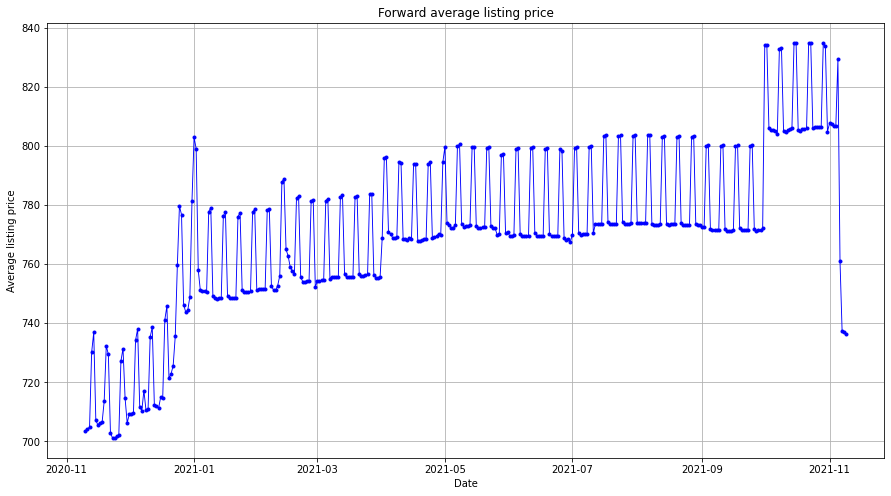

In [23]:
# Lets find out if there are a price trend for the upcoming year.

# Taking average
calendar_mean = calendar.dropna().groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_mean.date, calendar_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()

What happen if we exclude those that are unavailable? 

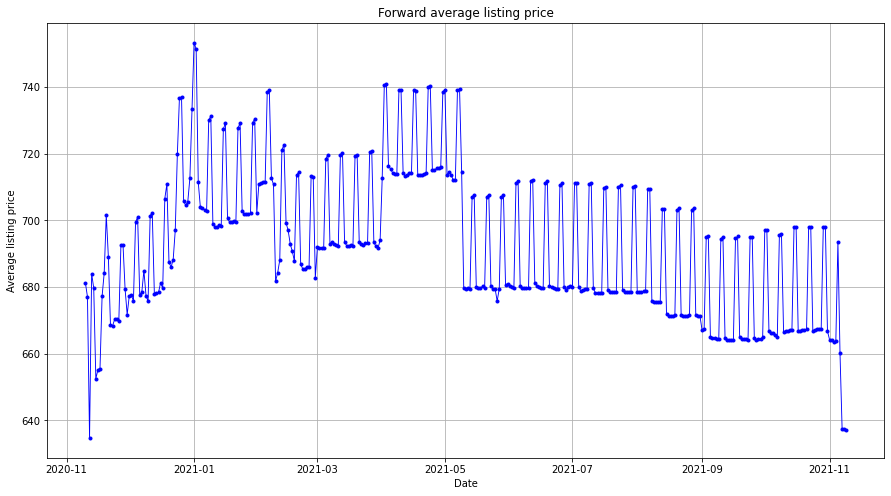

In [24]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()

calendar_mean = calendar1[(calendar1['available'] == True)]

# Taking average
calendar_mean = calendar_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_mean.date, calendar_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()

what happened if i plot those that are unavailable? 

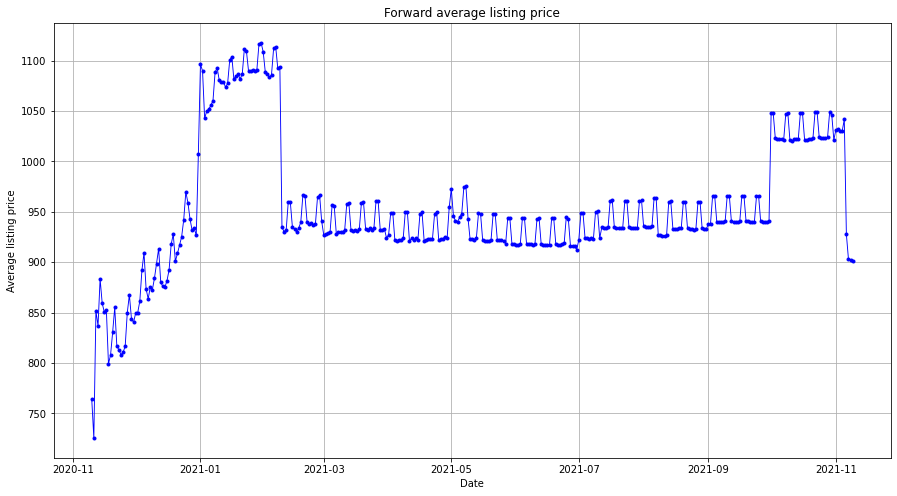

In [25]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()

calendar_mean = calendar1[(calendar1['available'] == False)]

# Taking average
calendar_mean = calendar_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_mean.date, calendar_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()


Let's take a look at the listing data.

In [26]:
detail_listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20201110180305,2020-11-10,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"In the upper part of trendy, hip Sheung Wan, w...",https://a0.muscache.com/pictures/84364564/1e0c...,160139,https://www.airbnb.com/users/show/160139,...,10.0,10.0,9.0,NaN,f,1,1,0,0,1.13


How many airbnb listings in Hong Kong? 

In [27]:
detail_listing.shape

(7226, 74)

In [28]:
detail_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7226 entries, 0 to 7225
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7226 non-null   int64  
 1   listing_url                                   7226 non-null   object 
 2   scrape_id                                     7226 non-null   int64  
 3   last_scraped                                  7226 non-null   object 
 4   name                                          7225 non-null   object 
 5   description                                   6844 non-null   object 
 6   neighborhood_overview                         3255 non-null   object 
 7   picture_url                                   7226 non-null   object 
 8   host_id                                       7226 non-null   int64  
 9   host_url                                      7226 non-null   o

Lets look at a few interesting column..

In [29]:
filtered_listing = detail_listing[['id','property_type', 'room_type', 'accommodates', 'neighbourhood_cleansed', 'review_scores_value', 'number_of_reviews', 
                                   'bedrooms', 'price', 'longitude', 'latitude']].copy()
#convert prices into numbers
filtered_listing['price'] = pd.to_numeric(filtered_listing['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

filtered_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7226 entries, 0 to 7225
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7226 non-null   int64  
 1   property_type           7226 non-null   object 
 2   room_type               7226 non-null   object 
 3   accommodates            7226 non-null   int64  
 4   neighbourhood_cleansed  7226 non-null   object 
 5   review_scores_value     3896 non-null   float64
 6   number_of_reviews       7226 non-null   int64  
 7   bedrooms                5924 non-null   float64
 8   price                   7226 non-null   float64
 9   longitude               7226 non-null   float64
 10  latitude                7226 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 621.1+ KB


In [30]:
filtered_listing

,id,property_type,room_type,accommodates,neighbourhood_cleansed,review_scores_value,number_of_reviews,bedrooms,price,longitude,latitude
0,69074,Entire apartment,Entire home/apt,3,Central & Western,9.0,134,1.0,1270.0,114.150180,22.283520
1,75083,Entire apartment,Entire home/apt,3,Central & Western,9.0,229,NaN,403.0,114.148390,22.283980
2,103760,Entire apartment,Entire home/apt,6,Central & Western,9.0,272,2.0,690.0,114.155700,22.284070
3,104626,Entire apartment,Entire home/apt,2,Central & Western,9.0,14,1.0,2575.0,114.148340,22.282220
4,132773,Entire apartment,Entire home/apt,6,Central & Western,10.0,210,2.0,845.0,114.144940,22.288680
...,...,...,...,...,...,...,...,...,...,...,...
7221,46304295,Entire apartment,Entire home/apt,4,Wan Chai,NaN,0,1.0,1308.0,114.170760,22.277280
7222,46318909,Shared room in hostel,Shared room,3,Yuen Long,NaN,0,NaN,52.0,114.063962,22.520766
7223,46323391,Entire apartment,Entire home/apt,2,Central & Western,NaN,0,1.0,750.0,114.128539,22.279915
7224,46342535,Entire apartment,Entire home/apt,2,Central & Western,NaN,0,1.0,400.0,114.142931,22.285564


Do we have more apartment or room on airbnb in Hong Kong?

In [31]:
filtered_listing['property_type'].value_counts()

Private room in apartment      2354
Entire apartment               1720
Private room in condominium     356
Entire condominium              338
Entire serviced apartment       306
                               ... 
Shared room in cottage            1
Private room in resort            1
Private room in boat              1
Island                            1
Private room in earth house       1
Name: property_type, Length: 77, dtype: int64

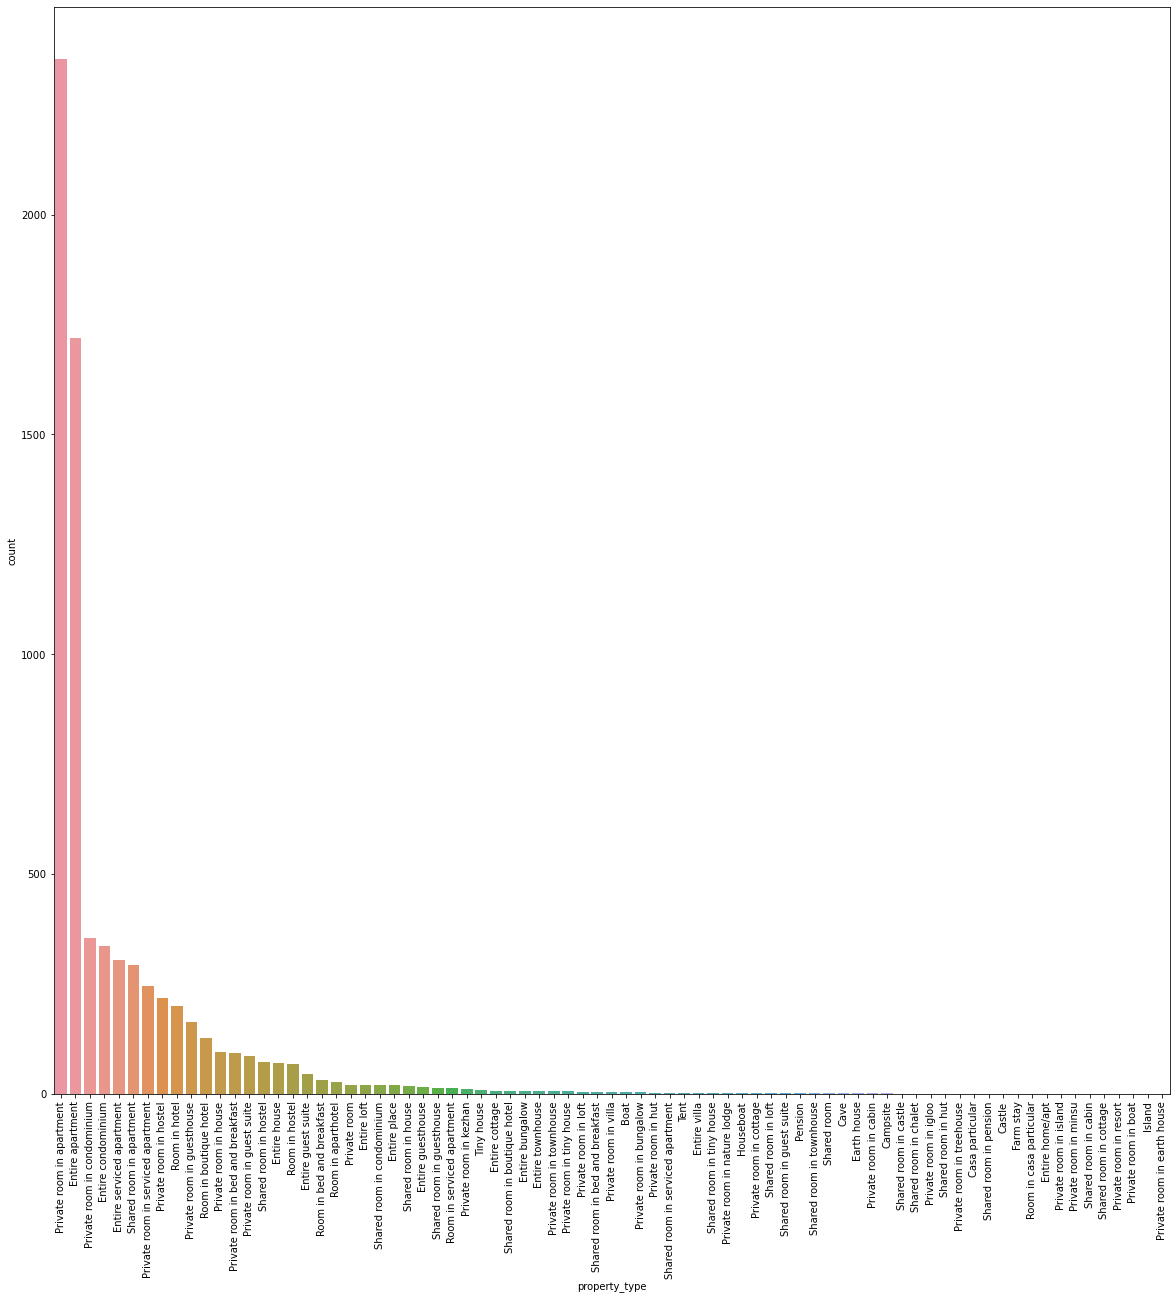

In [32]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('property_type')], order = filtered_listing['property_type'].value_counts().index)
plt.show()

Cant really tell from this as the category looks a bit messy...Lets try 'room_type'..

In [33]:
filtered_listing['room_type'].value_counts()

Private room       3975
Entire home/apt    2602
Shared room         459
Hotel room          190
Name: room_type, dtype: int64

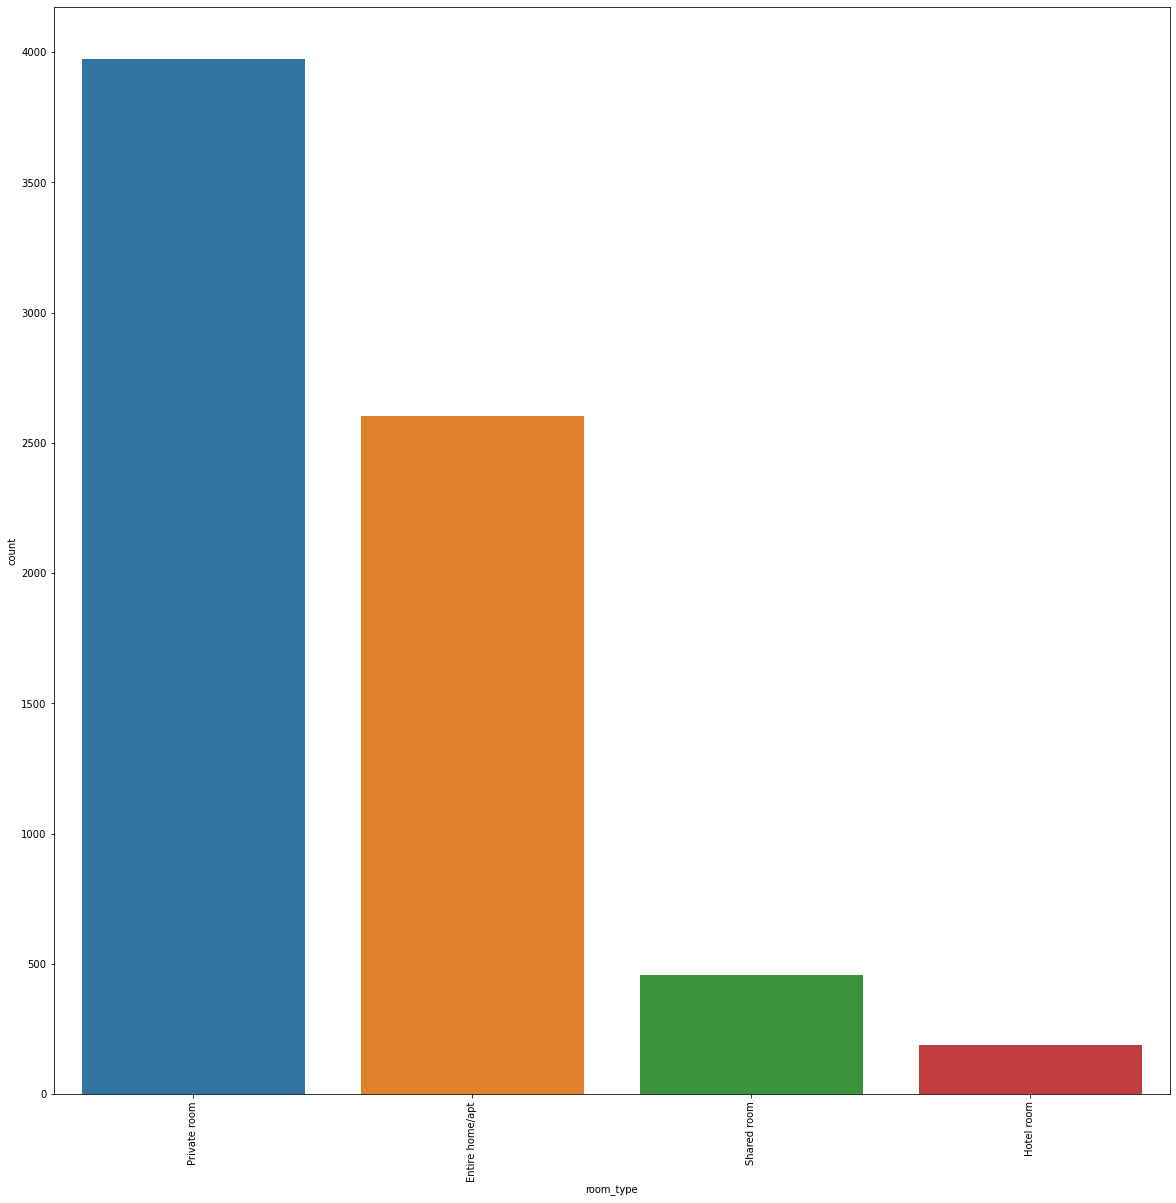

In [34]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('room_type')], order = filtered_listing['room_type'].value_counts().index)
plt.show()

That's much better. Most of the airbnb listings in Hong Kong are private room!

what is the most popular neighbourhood? (Or the neighbourhood that has highest number of listings)

In [35]:
(filtered_listing['neighbourhood_cleansed'].value_counts())/(filtered_listing['neighbourhood_cleansed'].count())

Yau Tsim Mong        0.433020
Wan Chai             0.202325
Central & Western    0.135068
Kowloon City         0.042070
Islands              0.039718
Eastern              0.036812
Sham Shui Po         0.023665
North                0.021450
Yuen Long            0.020066
Sai Kung             0.011210
Sha Tin              0.008027
Southern             0.006089
Tsuen Wan            0.004428
Tuen Mun             0.004152
Kwun Tong            0.004013
Kwai Tsing           0.003460
Tai Po               0.003183
Wong Tai Sin         0.001246
Name: neighbourhood_cleansed, dtype: float64

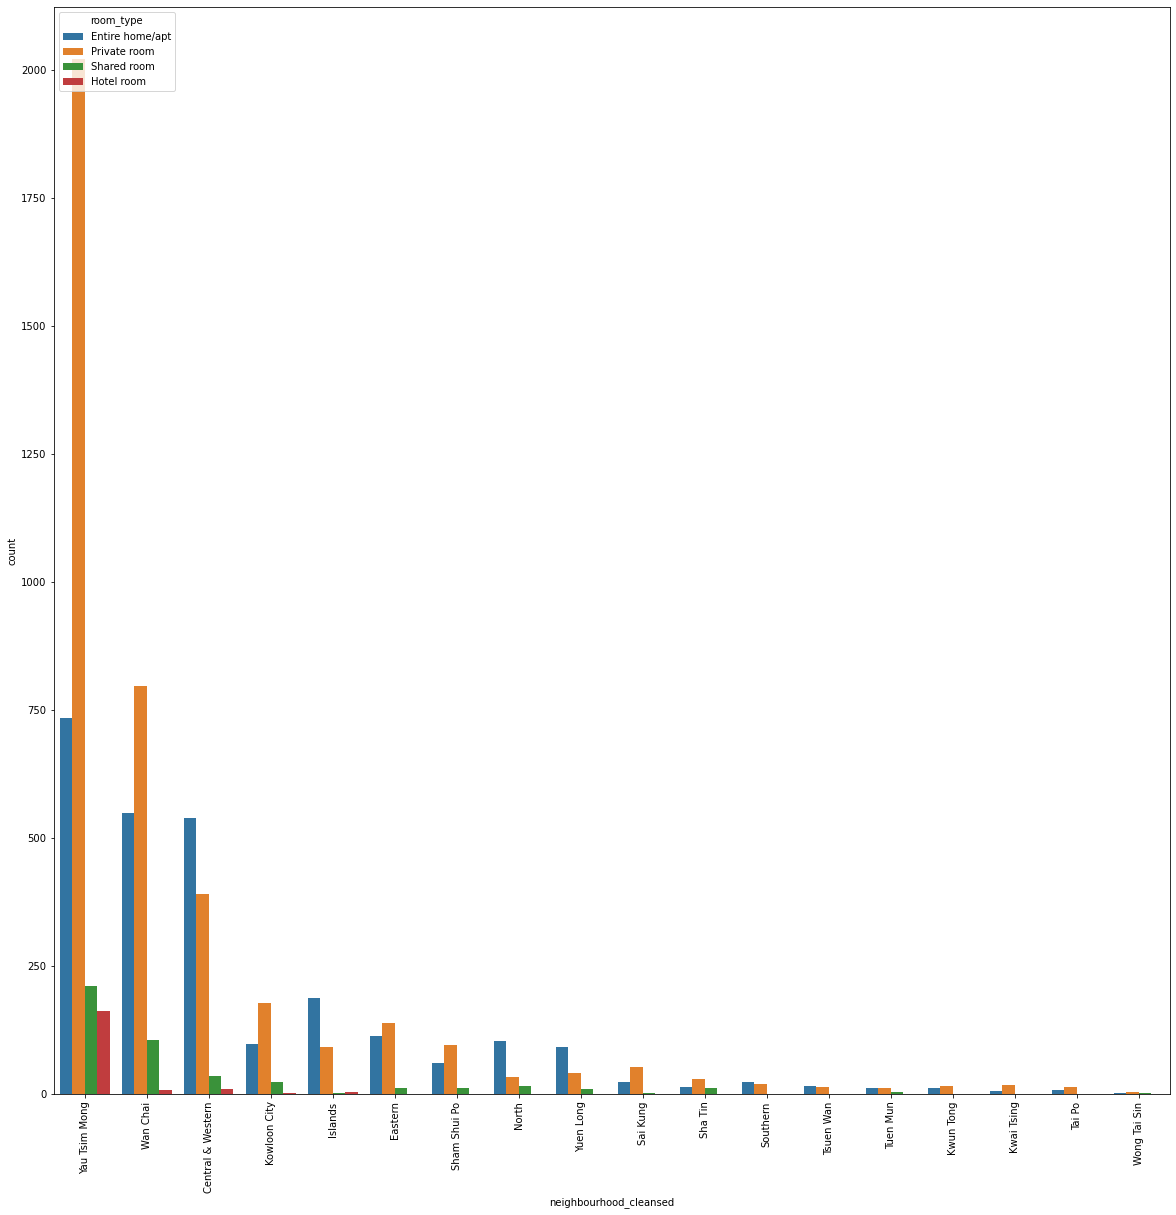

In [36]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('neighbourhood_cleansed')], hue= filtered_listing['room_type'], order = filtered_listing['neighbourhood_cleansed'].value_counts().index)
plt.show()



<AxesSubplot:xlabel='neighbourhood_cleansed'>

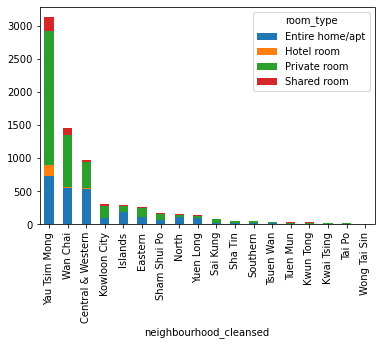

In [37]:
#A Stacked bar chart

df_plot = filtered_listing.groupby(['room_type', 'neighbourhood_cleansed']).size().reset_index().pivot(columns='room_type', index='neighbourhood_cleansed', values=0)
df_plot = df_plot.fillna(0)

df_plot['total'] = df_plot['Private room'] + df_plot['Entire home/apt'] + df_plot['Shared room'] + df_plot['Hotel room']
df_plot = df_plot.sort_values(by=['total'], ascending = False).drop(['total'], axis=1)
df_plot.plot(kind='bar', stacked=True)


In [38]:
neighbourhood_count = filtered_listing.groupby('neighbourhood_cleansed').property_type.count().sort_values(ascending=False).reset_index()
neighbourhood_count = neighbourhood_count.rename(columns={"property_type": "property_count"})
#neighbourhood_count.info() 
neighbourhood_count

,neighbourhood_cleansed,property_count
0,Yau Tsim Mong,3129
1,Wan Chai,1462
2,Central & Western,976
3,Kowloon City,304
4,Islands,287
5,Eastern,266
6,Sham Shui Po,171
7,North,155
8,Yuen Long,145
9,Sai Kung,81


The following plot also indicate where these listings are concentrated. 

In [39]:

#Creates a map of Hong Kong.
m = folium.Map(location=[22.34, 114.1], zoom_start = 11)
m.save('index.html')


#Takes the latitude and longitude coordinates and zips them into a form to be plotted.
lat = pd.to_numeric(filtered_listing['latitude'], errors = 'coerce')
lon = pd.to_numeric(filtered_listing['longitude'], errors = 'coerce')

#Zip togethers each list of latitude and longitude coordinates. 
lat_lon = list(zip(lat,lon))


mc = MarkerCluster().add_to(m)
for i in range(0,len(filtered_listing)):
    folium.Marker(location=lat_lon[i]).add_to(mc)

m.save('index.html')
display(m)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>, <AxesSubplot:>]],
      dtype=object)

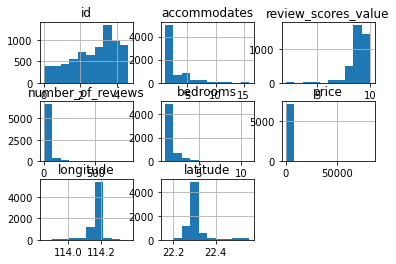

In [40]:
filtered_listing.hist()

Lets try to build a price model. The pricing data in calendar reflect pricing changes throughout the year so it should be used instead of the price column on the listing dataframe. Lets merge them and use price data in calendar. 


In [41]:
filtered_listing.rename(index=str, columns={"id": "listing_id"}, inplace= True)
filtered_listing_merged = pd.merge(filtered_listing, calendar , on= 'listing_id')

#changing categorial variable into binary dummies
filtered_listing_merged = pd.get_dummies(filtered_listing_merged, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])
filtered_listing_merged

#plt.figure(figsize = (16,16))
#sns.heatmap(filtered_listing2.corr(), annot=True, fmt=".2f");

,listing_id,property_type,accommodates,review_scores_value,number_of_reviews,bedrooms,price_x,longitude,latitude,date,...,neighbourhood_Sha Tin,neighbourhood_Sham Shui Po,neighbourhood_Southern,neighbourhood_Tai Po,neighbourhood_Tsuen Wan,neighbourhood_Tuen Mun,neighbourhood_Wan Chai,neighbourhood_Wong Tai Sin,neighbourhood_Yau Tsim Mong,neighbourhood_Yuen Long
0,69074,Entire apartment,3,9.0,134,1.0,1270.0,114.15018,22.283520,2020-11-10,...,0,0,0,0,0,0,0,0,0,0
1,69074,Entire apartment,3,9.0,134,1.0,1270.0,114.15018,22.283520,2020-11-11,...,0,0,0,0,0,0,0,0,0,0
2,69074,Entire apartment,3,9.0,134,1.0,1270.0,114.15018,22.283520,2020-11-12,...,0,0,0,0,0,0,0,0,0,0
3,69074,Entire apartment,3,9.0,134,1.0,1270.0,114.15018,22.283520,2020-11-13,...,0,0,0,0,0,0,0,0,0,0
4,69074,Entire apartment,3,9.0,134,1.0,1270.0,114.15018,22.283520,2020-11-14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637485,46343317,Private room in house,2,NaN,0,1.0,289.0,114.17899,22.317913,2021-11-05,...,0,0,0,0,0,0,0,0,0,0
2637486,46343317,Private room in house,2,NaN,0,1.0,289.0,114.17899,22.317913,2021-11-06,...,0,0,0,0,0,0,0,0,0,0
2637487,46343317,Private room in house,2,NaN,0,1.0,289.0,114.17899,22.317913,2021-11-07,...,0,0,0,0,0,0,0,0,0,0
2637488,46343317,Private room in house,2,NaN,0,1.0,289.0,114.17899,22.317913,2021-11-08,...,0,0,0,0,0,0,0,0,0,0


Attempt 1: drop NA

In [42]:
test = filtered_listing_merged.dropna()

#Split into explanatory and response variables

X = test.drop(['price_x','price_y','adjusted_price','property_type','date','listing_id','longitude','latitude','minimum_nights','maximum_nights'], axis=1)
y = test['adjusted_price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))


Linear Regression r2 score => train: 0.057, test: 0.060


In [43]:
#Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 993723.621, test: 1332149.910
Random Forest R^2 train: 0.734, test: 0.602


Attempt 2: fill NA with zero

In [44]:
test2 = filtered_listing_merged
test2['review_scores_value'] = test2['review_scores_value'].fillna(0)
test2['bedrooms'] = test2['bedrooms'].fillna(0)

#Split into explanatory and response variables

X = test2.drop(['price_x','price_y','adjusted_price','property_type','date','listing_id','longitude','latitude','minimum_nights','maximum_nights'], axis=1)
y = test2['adjusted_price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))


Linear Regression r2 score => train: 0.050, test: 0.050


In [45]:
#Lets try Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 1669681.235, test: 2357135.737
Random Forest R^2 train: 0.635, test: 0.471


The result is not better than dropping NA. Lets try to use more variables!

In [46]:
filtered_listing_long = detail_listing[['id',
'bedrooms',
'host_is_superhost',
'host_listings_count',
'host_total_listings_count',
'neighbourhood_cleansed',
'latitude',
'longitude',
'room_type',
'accommodates',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'instant_bookable',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms',
'reviews_per_month'
                                       ]].copy()



filtered_listing_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7226 entries, 0 to 7225
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7226 non-null   int64  
 1   bedrooms                                      5924 non-null   float64
 2   host_is_superhost                             7226 non-null   object 
 3   host_listings_count                           7226 non-null   int64  
 4   host_total_listings_count                     7226 non-null   int64  
 5   neighbourhood_cleansed                        7226 non-null   object 
 6   latitude                                      7226 non-null   float64
 7   longitude                                     7226 non-null   float64
 8   room_type                                     7226 non-null   object 
 9   accommodates                                  7226 non-null   i

In [47]:
#convert available into boolean
filtered_listing_long['host_is_superhost'] = filtered_listing_long['host_is_superhost'].map(d)
filtered_listing_long['instant_bookable'] = filtered_listing_long['instant_bookable'].map(d)

filtered_listing_long.rename(index=str, columns={"id": "listing_id"}, inplace= True)
filtered_listing_long_merged = pd.merge(filtered_listing_long, calendar , on= 'listing_id')

filtered_listing_long_merged = pd.get_dummies(filtered_listing_long_merged, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])
filtered_listing_long_merged

,listing_id,bedrooms,host_is_superhost,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,number_of_reviews,number_of_reviews_ltm,...,neighbourhood_Sha Tin,neighbourhood_Sham Shui Po,neighbourhood_Southern,neighbourhood_Tai Po,neighbourhood_Tsuen Wan,neighbourhood_Tuen Mun,neighbourhood_Wan Chai,neighbourhood_Wong Tai Sin,neighbourhood_Yau Tsim Mong,neighbourhood_Yuen Long
0,69074,1.0,True,2,2,22.283520,114.15018,3,134,1,...,0,0,0,0,0,0,0,0,0,0
1,69074,1.0,True,2,2,22.283520,114.15018,3,134,1,...,0,0,0,0,0,0,0,0,0,0
2,69074,1.0,True,2,2,22.283520,114.15018,3,134,1,...,0,0,0,0,0,0,0,0,0,0
3,69074,1.0,True,2,2,22.283520,114.15018,3,134,1,...,0,0,0,0,0,0,0,0,0,0
4,69074,1.0,True,2,2,22.283520,114.15018,3,134,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637485,46343317,1.0,False,0,0,22.317913,114.17899,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2637486,46343317,1.0,False,0,0,22.317913,114.17899,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2637487,46343317,1.0,False,0,0,22.317913,114.17899,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2637488,46343317,1.0,False,0,0,22.317913,114.17899,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
filtered_listing_long_merged.shape

(2637490, 55)

In [49]:
filtered_listing_long_merged.isnull().mean()

listing_id                                      0.000000
bedrooms                                        0.180183
host_is_superhost                               0.000000
host_listings_count                             0.000000
host_total_listings_count                       0.000000
latitude                                        0.000000
longitude                                       0.000000
accommodates                                    0.000000
number_of_reviews                               0.000000
number_of_reviews_ltm                           0.000000
number_of_reviews_l30d                          0.000000
review_scores_rating                            0.460836
review_scores_accuracy                          0.460836
review_scores_cleanliness                       0.460836
review_scores_checkin                           0.460836
review_scores_communication                     0.460836
review_scores_location                          0.460836
review_scores_value            

In [50]:
filtered_listing_long_merged.dropna().shape

(1189900, 55)

Attempt 3: long listing, drop NA

In [52]:
filtered_listing_long_merged_test = filtered_listing_long_merged.dropna()

#filtered_listing_long_merged_test = filtered_listing_long_merged.fillna(0)

#Split into explanatory and response variables


X = filtered_listing_long_merged_test.drop(['price','adjusted_price','date','listing_id','longitude','latitude','minimum_nights','maximum_nights'], axis=1)
y = filtered_listing_long_merged_test['adjusted_price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))

Linear Regression r2 score => train: 0.066, test: 0.066


In [ ]:
#coeff_pd = pd.DataFrame(lm_model.coef_,X_train.columns,columns=['Coefficient'])
#coeff_pd

In [53]:
#Using a Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 5851.028, test: 15328.700
Random Forest R^2 train: 0.998, test: 0.996


In [56]:
scores = cross_val_score(forest, X, y, cv=5)

Attempt 4: Now lets retry it with fill NA

In [57]:
scores

array([-7.54475619,  0.0928108 , -0.9075823 , -0.44845558, -3.03352433])

In [58]:
#filtered_listing_long_merged_test = filtered_listing_long_merged.dropna()

filtered_listing_long_merged_test = filtered_listing_long_merged.fillna(0)

#Split into explanatory and response variables


X = filtered_listing_long_merged_test.drop(['price','adjusted_price','date','listing_id','longitude','latitude','minimum_nights','maximum_nights'], axis=1)
y = filtered_listing_long_merged_test['adjusted_price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))

Linear Regression r2 score => train: 0.059, test: 0.060


In [59]:
#Using a Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 87212.175, test: 118342.670
Random Forest R^2 train: 0.981, test: 0.973


In [61]:
scores = cross_val_score(forest, X, y, cv=5)